**ENERGY PREDICTION**

**LINEAR REGRESSION**

In [0]:

#Importing a dataset
import pandas as pd
df = pd.read_csv('energydata_complete.csv')

In [0]:
# Getting info about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [0]:
#Column Names
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [0]:
#Missing Value Count
total=df.isnull().sum().sort_values(ascending=False)
per=df.isnull().sum()/df.isnull().count()*100
percentage=(round(per,2)).sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=['Total','%'])
missing_data

,Total,%
rv2,0,0.0
T6,0,0.0
Appliances,0,0.0
lights,0,0.0
T1,0,0.0
RH_1,0,0.0
T2,0,0.0
RH_2,0,0.0
T3,0,0.0
RH_3,0,0.0


In [0]:
#Dropping the random variable1
df = df.drop('rv1', axis = 1)

In [0]:
#Dropping the random variable 2
df = df.drop('rv2', axis = 1)

In [0]:
#Dropping the date variable from the dataframe
df = df.drop('date', axis = 1)

In [0]:
# Getting the target variable
y = df.pop('Appliances')

In [0]:
# Listing independent variable
x = df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint']]
       

In [0]:
# Splitting dataframe into test and train dataframe
from sklearn.model_selection import train_test_split

In [0]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=1234)

In [0]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((13814, 25), (13814,), (5921, 25), (5921,))

In [0]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#let's import the regression object and define model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Fit a model into train data
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Evaluate the model
predict_test=lm.predict(xtest)

In [0]:
#R2 Value
print("RSquare Value for TEST data is-")
np.round(lm.score(xtest,ytest)*100,0)

RSquare Value for TEST data is-


17.0

In [0]:
print("RSquare Value for TRAIN data is-")
np.round(lm.score(xtrain,ytrain)*100,0)

RSquare Value for TRAIN data is-


16.0

In [0]:
# Predict on test and training data
predict_test=lm.predict(xtest)

In [0]:
#Print the loss Function-MSE
import numpy as np
from sklearn import metrics
print ("Mean Square Error(MSE)for TEST data is")
np.round(metrics.mean_squared_error(ytest,predict_test),0)

Mean Square Error(MSE)for TEST data is


8523.0

In [0]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) for TEST data is")
np.round(mean_absolute_error(ytest,predict_test),0)

Mean Absolute Error(MAE) for TEST data is


52.0

In [0]:
#Append Data
fdf=pd.concat([xtest,ytest],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=fdf['Appliances']-fdf['Predicted']
fdf.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,Predicted,Prediction_Error
13095,0,22.500000,40.333333,22.790,37.863333,23.1000,38.400000,22.100000,39.730000,20.934,44.200000,17.366667,18.100000,22.033333,36.36,23.412000,41.894000,21.00,40.490000,16.150000,750.550000,59.500000,6.500000,40.0,8.000000,90,102.7,-12.7
18136,0,23.666667,37.963333,22.772,32.530000,23.9560,33.900000,23.500000,33.260000,22.700,38.500000,18.260000,1.000000,23.790000,28.79,25.157143,34.898571,22.89,39.236000,13.466667,760.700000,53.000000,1.666667,40.0,4.033333,100,180.4,-80.4
7721,0,19.890000,37.326667,17.200,40.700000,20.8900,38.000000,18.426667,36.500000,18.290,43.290000,1.900000,79.333333,18.290000,32.56,20.700000,43.700000,18.39,41.626667,1.200000,741.066667,96.833333,1.000000,36.0,0.766667,30,59.8,-29.8
9755,0,20.890000,36.826667,18.200,39.826667,21.2675,36.267500,19.600000,34.590000,18.290,45.030000,6.760000,45.933333,19.290000,30.20,21.666667,40.526667,19.50,38.126667,5.533333,762.683333,80.166667,3.000000,62.0,2.283333,190,72.7,117.3
4134,0,21.290000,43.450000,20.600,42.126667,22.2900,41.626667,20.100000,43.326667,20.000,46.433333,6.000000,88.366667,18.790000,37.70,21.280000,50.437778,19.00,44.963333,5.500000,736.000000,93.000000,4.000000,63.0,4.500000,60,89.7,-29.7


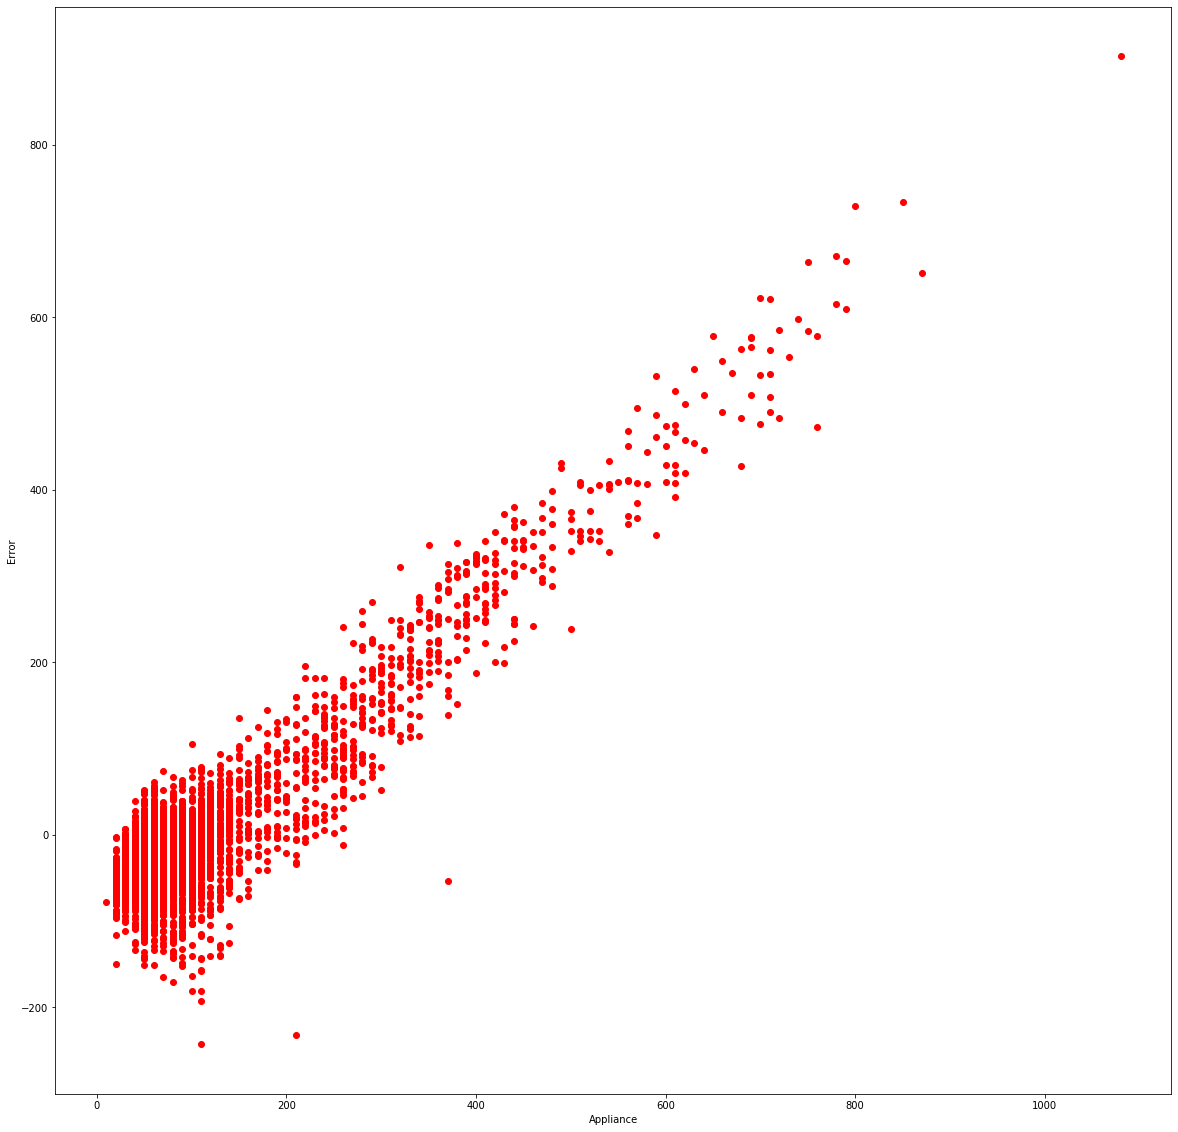

In [0]:
#Plotting Error versus actual values
plt.subplots(figsize=(20,20))
plt.scatter(fdf.Appliances,fdf.Prediction_Error,color='red')
plt.xlabel('Appliance')
plt.ylabel("Error")
plt.show();

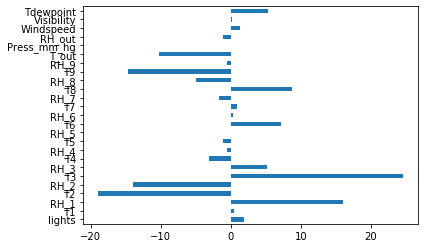

In [0]:
# Feature Importance from the linear regression
ft_importances =pd.Series(lm.coef_,index=x.columns)
ft_importances.plot(kind='barh')
plt.show();

In [0]:
len(lm.coef_)

25

**NEURAL NETWORK**

In [0]:
# Importing packages
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
#Initiating and compiling the model
model = Sequential()
model.add(Dense(500, input_dim=25, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [0]:
# fit model
history = model.fit(xtrain,ytrain, validation_data=(xtrain, ytrain), epochs=3000, verbose=0)

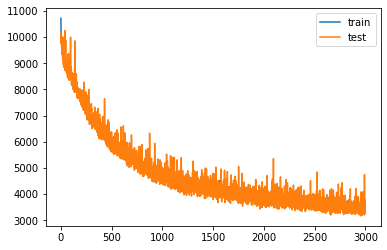

In [0]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
# Getting the predicited values from neural network
predictions = model.predict(xtest)

In [0]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, predictions)
mse

6902.2033139431405

In [0]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, predictions)

46.535714296387816

In [0]:
# Variance Explained by the model
from sklearn.metrics import explained_variance_score
explained_variance_score(ytest,  predictions)

0.32447632550783867

**RANDOM FOREST**

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 250, random_state = 42)

In [0]:
# Train the model on training data
rf.fit(xtest, ytest);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(xtest)

In [0]:
# Calculate the absolute errors
errors = (predictions - ytest)

In [0]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, predictions)
mse

881.37861036987

In [0]:
#Variance Explained by the model
from sklearn.metrics import explained_variance_score
explained_variance_score(ytest,  predictions)

0.9137424653034356

In [0]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, predictions)

14.438101672014863